Kaggle link

https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets

About Dataset

**Sales Prediction for Big Mart Outlets**

Indented blockThe data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

**Importing required libraies**

In [ ]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

**Importing Train DataSet**

In [ ]:
# loading the data from csv file to a pandas dataframe

df_train = pd.read_csv('/content/Train _sales.csv')

In [ ]:
# printing the first 5 columns of the dataframe
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# last 5 rows of the dataframe
df_train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
# number of rows & columns in the dataframe
df_train.shape

(8523, 12)

**statistical information**

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [ ]:
num_cols=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']

In [ ]:
# Calculate the median for a column
#median = df_train['Item_Outlet_Sales'].median()

# Replace any data point that is more than 3 standard deviations away from the median with the median value
#std = 3 * df_train['Item_Outlet_Sales'].std()
#df_train.loc[(df_train['Item_Outlet_Sales'] - median).abs() > std, 'Item_Outlet_Sales'] = median
     

In [ ]:
#plt.boxplot(df_train['Item_Outlet_Sales'])
#plt.title('Item_Outlet_Sales')
#plt.show()
     

In [ ]:
# Calculate the median for a column
#median = df_train['Item_Visibility'].median()

# Replace any data point that is more than 3 standard deviations away from the median with the median value
#std = 3 * df_train['Item_Visibility'].std()
#df_train.loc[(df_train['Item_Visibility'] - median).abs() > std, 'Item_Visibility'] = median
     

**Exploratory Data Analysis**

In [ ]:
df_train.shape

(8523, 12)

In [ ]:
df_train.dtypes #dtypes is to know what type of data it is

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# checking for missing values
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

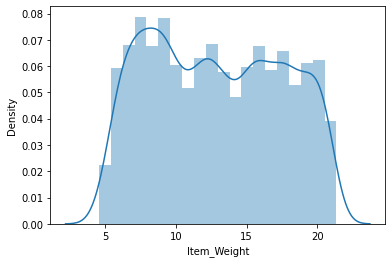



skewness: 1.177531
kurtosis: 1.615877


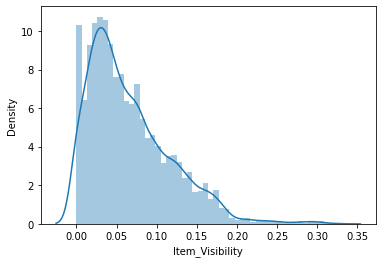



skewness: 1.177531
kurtosis: 1.615877


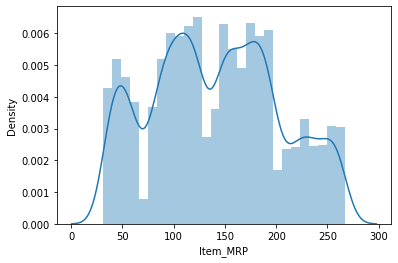



skewness: 1.177531
kurtosis: 1.615877


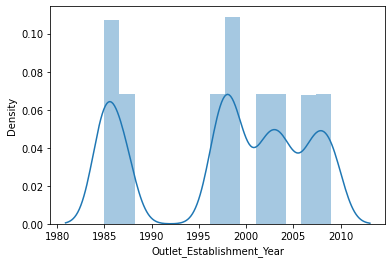



skewness: 1.177531
kurtosis: 1.615877


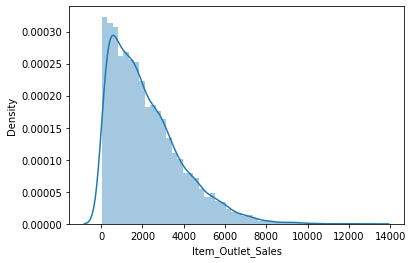



skewness: 1.177531
kurtosis: 1.615877


In [ ]:
# Skewness is a measure of symmetry, or more precisely, the lack of symmetry.
# A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 
# Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

import warnings
warnings.filterwarnings("ignore")

#kernel density plot
for i in num_cols:
  sns.distplot(df_train[i])
  plt.show()
  print('\n')
  print("skewness: %f" % df_train ["Item_Outlet_Sales" ].skew())
  print("kurtosis: %f" % df_train ["Item_Outlet_Sales" ].kurt())

In [ ]:
#descriptuve statistics summary of target variable
df_train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

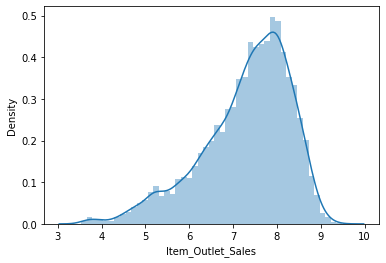

skewness: -0.882266
kurtosis: 0.532920


In [ ]:
#log transformation used to transform skwed data to approximately conform to normality

#log transform the target
df_train["Item_Outlet_Sales"] =np.log1p(df_train["Item_Outlet_Sales"])

#kernel Density plot
sns.distplot(df_train.Item_Outlet_Sales);
plt.show()

print("skewness: %f" % df_train["Item_Outlet_Sales"].skew())
print("kurtosis: %f" % df_train["Item_Outlet_Sales"].kurt())


In [ ]:
df_train['Item_Fat_Content'].describe()

count        8523
unique          5
top       Low Fat
freq         5089
Name: Item_Fat_Content, dtype: object

In [ ]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
df_train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [ ]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [ ]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)

In [ ]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Checking correlation and visualizing it**

In [ ]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.008059
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.192996
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.509886
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,0.077032
Item_Outlet_Sales,0.008059,-0.192996,0.509886,0.077032,1.000000


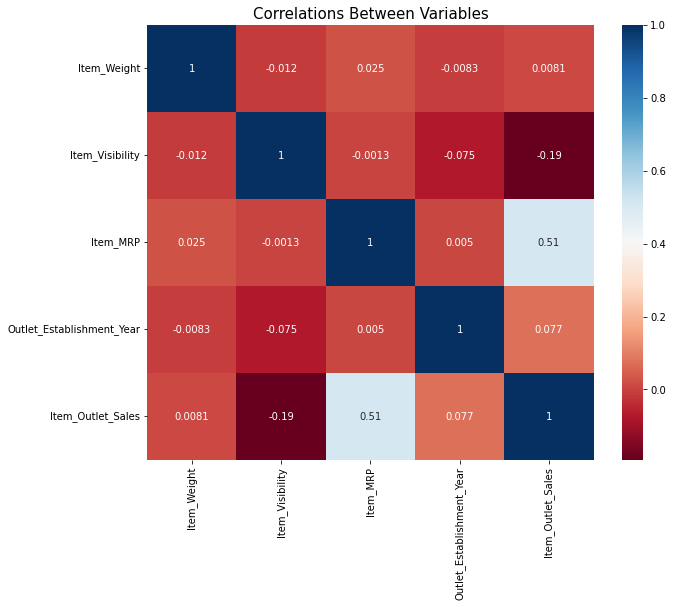

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), cmap="RdBu",annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show() #'RdBu' says take red to blue and having white in the middle , Red is negatively correlated and Blue is positively correlated

In [ ]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [ ]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,8.225808
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,6.096776
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,7.648868
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,6.597664
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,6.903451
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,7.929984
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,6.310436
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,7.085159
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,7.521100


In [ ]:
num=df_train._get_numeric_data() 
num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,8.225808
1,5.92,0.019278,48.2692,2009,6.096776
2,17.50,0.016760,141.6180,1999,7.648868
3,19.20,0.000000,182.0950,1998,6.597664
4,8.93,0.000000,53.8614,1987,6.903451


In [ ]:
cat=df_train.drop(num,axis=1)
cat.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1


In [ ]:
cat.nunique()

Item_Fat_Content         2
Item_Type               16
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64

In [ ]:
cat1=cat.drop(['Item_Type','Outlet_Size'],axis=1)

In [ ]:
cat2=cat[['Item_Type','Outlet_Size']]



> Indented block



In [ ]:
df_dummies =pd.get_dummies(cat1,drop_first=True)
df_dummies


,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,0,1,0,0
1,1,0,1,0,1,0
2,0,0,0,1,0,0
3,1,0,1,0,0,0
4,0,0,1,1,0,0
...,...,...,...,...,...,...
8518,0,0,1,1,0,0
8519,1,1,0,1,0,0
8520,0,1,0,1,0,0
8521,1,0,1,0,1,0


In [ ]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()

In [ ]:
for i in cat2:
  cat2[i]=label.fit_transform(cat2[i])

In [ ]:
cat2

,Item_Type,Outlet_Size
0,4,1
1,14,1
2,10,1
3,6,1
4,9,0
...,...,...
8518,13,0
8519,0,1
8520,8,2
8521,13,1


In [ ]:
final_data=num.join(df_dummies)
final_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,8.225808,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,6.096776,1,0,1,0,1,0
2,17.500,0.016760,141.6180,1999,7.648868,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,6.597664,1,0,1,0,0,0
4,8.930,0.000000,53.8614,1987,6.903451,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,7.929984,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,2002,6.310436,1,1,0,1,0,0
8520,10.600,0.035186,85.1224,2004,7.085159,0,1,0,1,0,0
8521,7.210,0.145221,103.1332,2009,7.521100,1,0,1,0,1,0


In [ ]:
final_data=final_data.join(cat2)


In [ ]:
final_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type,Outlet_Size
0,9.300,0.016047,249.8092,1999,8.225808,0,0,0,1,0,0,4,1
1,5.920,0.019278,48.2692,2009,6.096776,1,0,1,0,1,0,14,1
2,17.500,0.016760,141.6180,1999,7.648868,0,0,0,1,0,0,10,1
3,19.200,0.000000,182.0950,1998,6.597664,1,0,1,0,0,0,6,1
4,8.930,0.000000,53.8614,1987,6.903451,0,0,1,1,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,7.929984,0,0,1,1,0,0,13,0
8519,8.380,0.046982,108.1570,2002,6.310436,1,1,0,1,0,0,0,1
8520,10.600,0.035186,85.1224,2004,7.085159,0,1,0,1,0,0,8,2
8521,7.210,0.145221,103.1332,2009,7.521100,1,0,1,0,1,0,13,1


In [ ]:
final_data.shape

(8523, 13)

In [ ]:
from sklearn.model_selection import train_test_split
x=final_data.drop(['Item_Outlet_Sales'],axis=1)
y=final_data['Item_Outlet_Sales']

In [ ]:
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
x_train.shape

(6818, 12)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(max_depth=5,min_samples_leaf=3, min_samples_split =2)

In [ ]:
tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

In [ ]:
train_pred=tree.predict(x_train)
test_pred=tree.predict(x_test)     

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
train_r2 =r2_score(y_train, train_pred)
test_r2= r2_score(y_test, test_pred)

In [ ]:
print('train r2 :', train_r2)
print('test r2:', test_r2)

train r2 : 0.7419199293018985
test r2: 0.716671909499234


In [ ]:
train_mse =mean_squared_error(y_train, train_pred)
test_mse= mean_squared_error(y_test, test_pred)

In [ ]:
print('train mse :', train_mse)
print('test mse:', test_mse)

train mse : 0.265552702496651
test mse: 0.29365531637533854


In [ ]:
param_grid = {
    'max_depth': range( 5),
    'min_samples_split': [2, 5],
    'min_samples_leaf': [ 2, 3]
}

In [ ]:
grid_cv = GridSearchCV(rand, param_grid, cv=5)

In [ ]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=18, min_samples_leaf=2,
                                             min_samples_split=5),
             param_grid={'max_depth': range(0, 5), 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 5]})

In [ ]:
train_p1=grid_cv.predict(x_train)
test_p1=grid_cv.predict(x_test)   

In [ ]:
train_r2 =r2_score(y_train, train_p1)
test_r2= r2_score(y_test, test_p1)

In [ ]:
print('train acc :', train_r2)
print('test acc:', test_r2)

train acc : 0.6890052215326825
test acc: 0.6808290491222799


In [ ]:
train__mse1 = mean_squared_error(y_train, train_p1)
test_mse1= mean_squared_error(y_test,test_p1)


In [ ]:
rmse = np.sqrt(train__mse1)
rmse2 = np.sqrt(test_mse1)

In [ ]:
print('train mse1 :', train__mse1)
print('test mse:', test_mse1)

train mse1 : 0.31999953991391633
test mse: 0.3308046385099296


In [ ]:
print('RMSE :', rmse)
print('RMSE:', rmse2)

RMSE : 0.5656850182866048
RMSE: 0.575156186187656


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rand = RandomForestRegressor(max_depth=18,min_samples_leaf=2,min_samples_split=5)

In [ ]:
rand.fit(x_train,y_train)

RandomForestRegressor(max_depth=18, min_samples_leaf=2, min_samples_split=5)

In [ ]:
train_pred1=rand.predict(x_train)
test_pred1=rand.predict(x_test)   

In [ ]:
train_r2 =r2_score(y_train, train_pred1)
test_r2= r2_score(y_test, test_pred1)

In [ ]:
print('train acc :', train_r2)
print('test acc:', test_r2)

train acc : 0.9144442018715843
test acc: 0.7038881582254111


In [ ]:
train_mse1 =mean_squared_error(y_train, train_pred1)
test_mse1= mean_squared_error(y_test, test_pred1)

In [ ]:
print('train mse :', train_mse1)
print('test mse:', test_mse1)

train mse : 0.08803304085357204
test mse: 0.3069050316370448
